# Sesión #8 

# ENIGH 2020



## ¿Qué es y para qué sirve?

La Encuesta Nacional de Ingresos y Gastos de los Hogares (ENIGH) es una encuesta que se publica cada dos años. Su objetivo es proporcionar un panorama estadístico del comportamiento de los ingresos y gastos de los hogares en cuanto a su monto, procedencia y distribución; adicionalmente, ofrece información sobre las características ocupacionales y sociodemográficas de los integrantes del hogar, así como las características de la infraestructura de la vivienda y el equipamiento del hogar.

La última edición (2020) se llevó a cabo del 21 de agosto al 28 de noviembre de 2020.

Uno de sus principales usos es el que le da el Coneval, pues a partir de la ENIGH se realizan las mediciones de pobreza multidimensional. Si quieres ver cómo hace el Coneval los cálculos en R, Stata y SPSS, puedes consultarlos aquí: 

https://www.coneval.org.mx/Medicion/MP/Paginas/Programas_BD_08_10_12_14_16_18.aspx

https://www.coneval.org.mx/Medicion/MP/Paginas/Programas_BD_2018-2020.aspx

### ¿Cómo descargarla?
Actualmente la puedes descargar entrando al sitio del [INEGI](https://www.inegi.org.mx), y siguiendo la ruta Datos -> Programas -> Encuestas en hogares -> Regulares -> ENIGH -> Nueva serie -> Microdatos. Ahí también encontrarás los resultados simplificados que publica el INEGI y, además de los cuestionarios que realizan, está el documento [Descripción de la base de datos](https://www.inegi.org.mx/app/biblioteca/ficha.html?upc=889463901242) que explica cada una de las variables que aparecen en la ENIGH.

### Composición de la ENIGH

La base de datos de la nueva serie de la ENIGH 2020, está conformada por 16 tablas de datos normalizadas (todos los atributos no llave de una relación dependen solo y exclusivamente de la llave) en las que se distribuye la información obtenida de la encuesta de acuerdo con los temas más usados para realizar análisis y tabulados. 

Tabla con información de las viviendas

1. VIVIENDAS

Tablas con información de los hogares

2. HOGARES
3. GASTOSHOGAR
4. EROGACIONES
5. GASTOTRARJETAS

Tablas con información de las personas

6. POBLACION
7. INGRESOS
8. GASTOPERSONA
9. TRABAJOS
10. AGRO 
11. NOAGRO
12. AGROPORUDUCTOS
13. AGROCONSUMO
14. AGROGASTO
15. NOAGROIMPORTES
16. INGRESOS_JCF

Tabla resumen con información a nivel hogar

17. CONCENTRADOHOGAR - Esta tabla contiene las variables construidas, a partir de las tablas de la base de datos, que permiten tener agrupada la información con la cual se obtienen los principales tabulados que el INEGI construye.



### Unidades de análisis

Las unidades de análisis para la ENIGH son la vivienda, el hogar y los integrantes del hogar. La descripción de estos campos es la siguiente:

- **Folioviv** (Folio de la vivienda). Consta de 10 dígitos: dos dígitos con la clave de la entidad federativa, uno con el ámbito (urbano, código diferente a 6; rural, código 6), cuatro dígitos del número consecutivo de la upm (unidad primaria de muestreo), un dígito de la decena de levantamiento y dos dígitos con un número consecutivo para la vivienda seleccionada.
- **Foliohog** (Folio del hogar).  Dígito para identificar a los hogares en la vivienda: se asigna 1 al hogar principal (el que inicialmente atendió la entrevista) o cuando en la vivienda solo habita un hogar; cuando se detecten varios hogares (hogares adicionales) se les asignan dígitos del 2 al 5. 
- **Numren** (Número de renglón). Es el número de identificación único para cada integrante del hogar (es el número del renglón del cuestionario en el que se captó la información del mismo). 

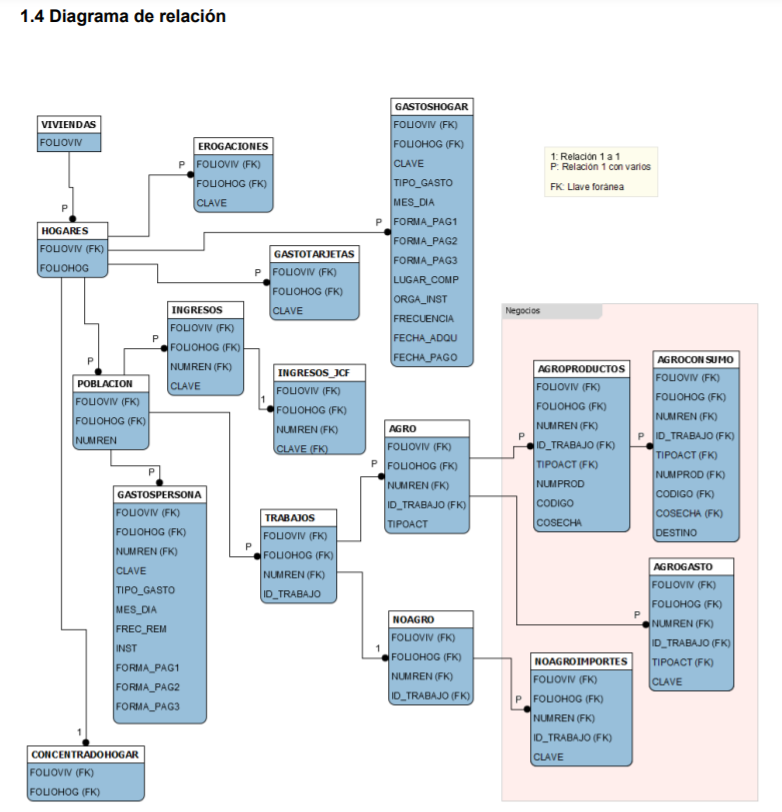

In [1]:
### Para ver imágenes
from IPython.display import Image
Image('Imagenes\ENIGH_2020_DR.png')

### Factor de expansión

Una de las características distintivas de las encuestas probabilísticas en hogares es que las viviendas seleccionadas y las personas que residen en ellas representan a otras viviendas y personas de condiciones socioeconómicas similares. El factor de expansión constituye el peso que se le da a cada unidad muestral para generalizar los resultados de la muestra a la población.

En la ENIGH 2020 el factor de expansión para cualquier nivel (vivienda, hogar o persona) se encuentra en la variable `factor` de la tabla VIVIENDA y también en la tabla resumen CONCENTRADOHOGAR.

## Anáisis con Python

Para los propósitos del curso sólo utilizaremos la tabla resumen CONCENTRADOHOGAR, en formato **dta**. 

In [2]:
# Cargar librerías
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
# Cargar la base
enigh_completa = pd.read_stata('Bases\concentradohogar.dta')

In [4]:
enigh_completa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89006 entries, 0 to 89005
Columns: 126 entries, folioviv to smg
dtypes: float64(116), object(10)
memory usage: 86.2+ MB


In [5]:
enigh_completa.head(8)

,folioviv,foliohog,ubica_geo,tam_loc,est_socio,est_dis,upm,factor,clase_hog,sexo_jefe,...,mater_serv,material,servicio,deposito,prest_terc,pago_tarje,deudas,balance,otras_erog,smg
0,0100013605,1,01001,1,3,002,0000001,190.0,2,2,...,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,11089.8
1,0100013606,1,01001,1,3,002,0000001,190.0,2,1,...,0.00,0.00,0.0,0.00,0.00,0.0,2360.65,0.0,0.0,11089.8
2,0100017801,1,01001,1,3,002,0000002,189.0,2,1,...,78.68,78.68,0.0,983.60,0.00,0.0,0.00,0.0,0.0,11089.8
3,0100017802,1,01001,1,3,002,0000002,189.0,2,1,...,0.00,0.00,0.0,0.00,885.24,0.0,0.00,0.0,0.0,11089.8
4,0100017803,1,01001,1,3,002,0000002,189.0,2,1,...,0.00,0.00,0.0,5901.63,0.00,0.0,0.00,0.0,0.0,11089.8
5,0100017804,1,01001,1,3,002,0000002,189.0,2,1,...,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,11089.8
6,0100017805,1,01001,1,3,002,0000002,189.0,2,1,...,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,11089.8
7,0100021401,1,01001,1,3,002,0000003,168.0,2,1,...,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,11089.8


In [120]:
# Es una buena práctica, cuando la base es manejable en términos de memoria, 
# crear una copia de los datos sobre la cual trabajar
enigh = enigh_completa.copy()

# Filtramos las variables que vamos a usar
enigh = enigh[['factor', 'tot_integ', 'percep_ing', 'ocupados', 
               'ing_cor', 'ingtrab', 'transfer', 'estim_alqu', 'rentas', 'otros_ing']]

enigh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89006 entries, 0 to 89005
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   factor      89006 non-null  float64
 1   tot_integ   89006 non-null  float64
 2   percep_ing  89006 non-null  float64
 3   ocupados    89006 non-null  float64
 4   ing_cor     89006 non-null  float64
 5   ingtrab     89006 non-null  float64
 6   transfer    89006 non-null  float64
 7   estim_alqu  89006 non-null  float64
 8   rentas      89006 non-null  float64
 9   otros_ing   89006 non-null  float64
dtypes: float64(10)
memory usage: 7.5 MB


In [121]:
enigh.head()

,factor,tot_integ,percep_ing,ocupados,ing_cor,ingtrab,transfer,estim_alqu,rentas,otros_ing
0,190.0,3.0,2.0,1.0,16229.49,13278.68,2459.01,0.0,0.0,491.80
1,190.0,4.0,2.0,1.0,31425.68,22254.09,1671.59,7500.0,0.0,0.00
2,189.0,2.0,2.0,2.0,33979.16,33979.16,0.00,0.0,0.0,0.00
3,189.0,2.0,1.0,1.0,71557.37,71557.37,0.00,0.0,0.0,0.00
4,189.0,2.0,1.0,1.0,90703.26,48113.11,22131.14,18000.0,0.0,2459.01


## Resultados básicos 

A continuación replicaremos algunos de los [resultados básicos](https://www.inegi.org.mx/contenidos/programas/enigh/nc/2020/doc/enigh2020_ns_presentacion_resultados.pdf) que publica el INEGI con esta encuesta. 




### Características de los hogares

Nótese la suma de la columna `factor` representa el número total de hogares, que al multiplicar cada una por el número total de integrantes de cada hogar nos da la población total. 

In [7]:
# Se puede calcular el número total de viviendas? 

# Total de hogares
enigh.factor.sum()
# Total de personas 
np.sum(enigh.tot_integ*enigh.factor)
# Tamaño del hogar promedio 
np.average(enigh.tot_integ, weights=enigh.factor) # nótese el promedio ponderado
# Promedio de perceptores de ingreso por hogar
np.average(enigh.percep_ing, weights=enigh.factor)
# Promedio de integrantes del hogar ocupados
np.average(enigh.ocupados, weights=enigh.factor)

1.6530632082392729

In [116]:
cac_hog = {
    'Total de hogares': enigh.factor.sum(), 
    'Total de personas ': np.sum(enigh.tot_integ*enigh.factor),
    'Tamaño del hogar promedio': np.average(enigh.tot_integ, weights=enigh.factor),
    'Promedio de perceptores de ingreso por hogar': np.average(enigh.percep_ing, weights=enigh.factor),
    'Promedio de integrantes del hogar ocupados': np.average(enigh.ocupados, weights=enigh.factor)
}
tabla_hogar = pd.DataFrame.from_dict(cac_hog, orient='index', columns=['Valor'])
#tabla_hogar
tabla_hogar.Valor.round(1)

Total de hogares                                 35749659.0
Total de personas                               126760856.0
Tamaño del hogar promedio                               3.5
Promedio de perceptores de ingreso por hogar            2.2
Promedio de integrantes del hogar ocupados              1.7
Name: Valor, dtype: float64

### Ingresos de los hogares


In [118]:
# Ingreso corriente promedio trimestral sin factor 
enigh.ing_cor.mean()
# Ingreso corriente promedio trimestral con factor 
np.average(enigh.ing_cor, weights=enigh.factor)

50309.31315023509

Distribución porcentual del ingreso corriente total por principales fuentes del ingreso

El ingreso corriente trimestral se divide a su vez en:

- Ingreso del trabajo `ingtrab`
- Transferencias `transfer`
- Estimación del alquiler de la vivienda `estim_alqu`
- Renta de la propiedad `rentas`
- Otros ingresos corrientes `otros_ing`

In [9]:
np.average(enigh.ingtrab, weights=enigh.factor)
np.average(enigh.transfer, weights=enigh.factor)
np.average(enigh.estim_alqu, weights=enigh.factor)
np.average(enigh.rentas, weights=enigh.factor)
np.average(enigh.otros_ing, weights=enigh.factor)

44.23655213102872

In [ ]:
# Gráfica de pie 

### Deciles de ingreso

Uno de los principales resultados de la ENIGH es que nos permite generar los llamados deciles de ingreso. 

A continuación se muestra cómo calcular los deciles y el ingreso promedio de cada uno. 

In [10]:
# Sin factor de expansión estos serían muy fáciles de calcular:
deciles = np.linspace(0.1, 1, 10)
np.quantile(enigh.ing_cor, deciles)

array([   13469.66 ,    18934.42 ,    23919.845,    29188.14 ,
          35172.005,    42256.84 ,    51603.25 ,    65267.16 ,
          90895.49 , 10702107.4  ])

In [11]:
def weighted_quantile(values, quantiles, sample_weight=None, 
                      values_sorted=False, old_style=False):
    """ Very close to numpy.percentile, but supports weights.
    NOTE: quantiles should be in [0, 1]!
    :param values: numpy.array with data
    :param quantiles: array-like with many quantiles needed
    :param sample_weight: array-like of the same length as `array`
    :param values_sorted: bool, if True, then will avoid sorting of
        initial array
    :param old_style: if True, will correct output to be consistent
        with numpy.percentile.
    :return: numpy.array with computed quantiles.
    :ref: https://stackoverflow.com/questions/21844024/weighted-percentile-using-numpy
    """
    values = np.array(values)
    quantiles = np.array(quantiles)
    if sample_weight is None:
        sample_weight = np.ones(len(values))
    sample_weight = np.array(sample_weight)
    assert np.all(quantiles >= 0) and np.all(quantiles <= 1), \
        'quantiles should be in [0, 1]'

    if not values_sorted:
        sorter = np.argsort(values)
        values = values[sorter]
        sample_weight = sample_weight[sorter]

    weighted_quantiles = np.cumsum(sample_weight) - 0.5 * sample_weight
    if old_style:
        # To be convenient with numpy.percentile
        weighted_quantiles -= weighted_quantiles[0]
        weighted_quantiles /= weighted_quantiles[-1]
    else:
        weighted_quantiles /= np.sum(sample_weight)
    return np.interp(quantiles, weighted_quantiles, values)

In [13]:
deciles_ingreso = weighted_quantile(enigh.ing_cor, deciles, sample_weight=enigh.factor)
deciles_ingreso

array([   13955.53318717,    19666.26389474,    24885.24      ,
          30326.07      ,    36623.41790437,    44017.14342484,
          53861.43488525,    68533.32114003,    96110.34712139,
       10702107.4       ])

Considerando el factor de expansión estas cifras cambian, y el cambio es mayor cuanto más subimos en la distribución del ingreso. 

Interpretación: un hogar cuyo ingreso corriente trimestral sea mayor a 96,110 pesos (aprox. 32,000 al mes) se considera del 10% más rico por ingresos del país.

Ahora calculamos el ingreso promedio trimestral de cada decil, que es lo que comunmente publica el INEGI respecto a los deciles de ingreso.

In [123]:
# Para asignar a cada observación el decil correspondiente
cond = [
    enigh.ing_cor <= deciles_ingreso[0],
    (deciles_ingreso[0] < enigh.ing_cor) & (enigh.ing_cor <= deciles_ingreso[1]),
    (deciles_ingreso[1] < enigh.ing_cor) & (enigh.ing_cor <= deciles_ingreso[2]),
    (deciles_ingreso[2] < enigh.ing_cor) & (enigh.ing_cor <= deciles_ingreso[3]),
    (deciles_ingreso[3] < enigh.ing_cor) & (enigh.ing_cor <= deciles_ingreso[4]),
    (deciles_ingreso[4] < enigh.ing_cor) & (enigh.ing_cor <= deciles_ingreso[5]),
    (deciles_ingreso[5] < enigh.ing_cor) & (enigh.ing_cor <= deciles_ingreso[6]),
    (deciles_ingreso[6] < enigh.ing_cor) & (enigh.ing_cor <= deciles_ingreso[7]),
    (deciles_ingreso[7] < enigh.ing_cor) & (enigh.ing_cor <= deciles_ingreso[8]),
    (deciles_ingreso[8] < enigh.ing_cor) & (enigh.ing_cor <= deciles_ingreso[9])
]

asigna = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# similar a case_when de R
enigh['Decil_ing'] = np.select(cond, asigna)

In [124]:
enigh.head()

,factor,tot_integ,percep_ing,ocupados,ing_cor,ingtrab,transfer,estim_alqu,rentas,otros_ing,Decil_ing
0,190.0,3.0,2.0,1.0,16229.49,13278.68,2459.01,0.0,0.0,491.80,2
1,190.0,4.0,2.0,1.0,31425.68,22254.09,1671.59,7500.0,0.0,0.00,5
2,189.0,2.0,2.0,2.0,33979.16,33979.16,0.00,0.0,0.0,0.00,5
3,189.0,2.0,1.0,1.0,71557.37,71557.37,0.00,0.0,0.0,0.00,9
4,189.0,2.0,1.0,1.0,90703.26,48113.11,22131.14,18000.0,0.0,2459.01,9


In [28]:
# Sin factor esto sería muy fácil de calcular: 
# enigh[['Decil_ing', 'ing_cor']].groupby('Decil_ing').mean()
enigh.groupby(['Decil_ing'])[['ing_cor']].mean()

,ing_cor
Decil_ing,
1,9911.694036
2,16889.286574
3,22260.806713
4,27567.069872
5,33365.036257
6,40112.207488
7,48702.848413
8,60617.738415
9,80282.028405


In [125]:
# Con factor es un paso más complicado
# Definir una función lambda para calcular la media ponderada
wm = lambda x: np.average(x, weights=enigh.loc[x.index, "factor"])

enigh.groupby(['Decil_ing']).agg(ingreso_promedio = ("ing_cor", wm))

,ingreso_promedio
Decil_ing,
1,9937.949681
2,16862.653950
3,22274.161917
4,27559.019325
5,33366.881825
6,40107.278235
7,48670.756076
8,60598.850913
9,80436.767792


El ingreso promedio al trimestre: 
- Los hogares del primer decil tuvieron un ingreso promedio de 9,938 pesos.
- Para los hogares del décimo decil, dicho ingreso promedio fue de 163,282 pesos.

### Índice de Gini


In [39]:
def gini(x, w=None):
    # source: https://stackoverflow.com/questions/48999542/more-efficient-weighted-gini-coefficient-in-python
    x = np.asarray(x)
    if w is not None:
        w = np.asarray(w)
        sorted_indices = np.argsort(x)
        sorted_x = x[sorted_indices]
        sorted_w = w[sorted_indices]
        # Force float dtype to avoid overflows
        cumw = np.cumsum(sorted_w, dtype=float)
        cumxw = np.cumsum(sorted_x * sorted_w, dtype=float)
        return (np.sum(cumxw[1:] * cumw[:-1] - cumxw[:-1] * cumw[1:]) / 
                (cumxw[-1] * cumw[-1]))
    else:
        sorted_x = np.sort(x)
        n = len(x)
        cumx = np.cumsum(sorted_x, dtype=float)
        # The above formula, with all weights equal to 1 simplifies to:
        return (n + 1 - 2 * np.sum(cumx) / cumx[-1]) / n

In [43]:
#gini(enigh.ing_cor)
gini(enigh.ing_cor, enigh.factor)

0.42597763278101686

### Curva de Lorenz 
La curva de Lorenz es una gráfica que describe cómo varía la distribución del ingreso de una población respecto a una distribución perfectamente igualitaria. El porcentaje de receptores de ingresos (o bien los deciles) se representa en el eje horizontal, no en términos absolutos, sino en porcentajes acumulativos, mientras que el eje vertical muestra la proporción del ingreso total recibido por cada porcentaje de la población (también en forma acumulada).

In [128]:
db_lorenz = enigh.groupby(['Decil_ing']).agg(ingreso_total = ("ing_cor", 'sum'))
db_lorenz

,ingreso_total
Decil_ing,
1,9.511262e+07
2,1.610731e+08
3,2.056676e+08
4,2.484896e+08
5,3.024874e+08
6,3.504604e+08
7,4.317020e+08
8,5.300415e+08
9,6.715592e+08


In [129]:
db_lorenz['Pop_ing_tot'] = db_lorenz.ingreso_total/np.sum(db_lorenz.ingreso_total)*100
db_lorenz = db_lorenz.reset_index()
db_lorenz

,Decil_ing,ingreso_total,Pop_ing_tot
0,1,9.511262e+07,2.233785
1,2,1.610731e+08,3.782913
2,3,2.056676e+08,4.830245
3,4,2.484896e+08,5.835948
4,5,3.024874e+08,7.104125
5,6,3.504604e+08,8.230802
6,7,4.317020e+08,10.138819
7,8,5.300415e+08,12.448389
8,9,6.715592e+08,15.772029
9,10,1.261319e+09,29.622944


In [130]:
ceros = pd.DataFrame(np.zeros((1,3)), columns=['Decil_ing', 'ingreso_total', 'Pop_ing_tot'])
db_lorenz = pd.concat([ceros, db_lorenz])
db_lorenz

,Decil_ing,ingreso_total,Pop_ing_tot
0,0.0,0.000000e+00,0.000000
0,1.0,9.511262e+07,2.233785
1,2.0,1.610731e+08,3.782913
2,3.0,2.056676e+08,4.830245
3,4.0,2.484896e+08,5.835948
4,5.0,3.024874e+08,7.104125
5,6.0,3.504604e+08,8.230802
6,7.0,4.317020e+08,10.138819
7,8.0,5.300415e+08,12.448389
8,9.0,6.715592e+08,15.772029


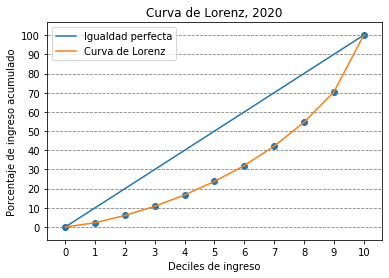

In [134]:
# Figura
fig, ax = plt.subplots()  # Crear una figura y un axes
ax.plot(db_lorenz.Decil_ing, np.arange(0, 110, 10), label='Igualdad perfecta')  # Graficar los datos sobre el axes
ax.plot(db_lorenz.Decil_ing, np.cumsum(db_lorenz.Pop_ing_tot), label='Curva de Lorenz')
ax.scatter(x=db_lorenz.Decil_ing, y=np.cumsum(db_lorenz.Pop_ing_tot))
#ax.fill_between(db_lorenz.Decil_ing, np.arange(0, 110, 10), np.cumsum(db_lorenz.Pop_ing_tot))
ax.set_xlabel('Deciles de ingreso')  # Añadir etiqueta al eje x del axes
ax.set_ylabel('Porcentaje de ingreso acumulado')  # Añadir etiqueta al eje y del axes
ax.set_title("Curva de Lorenz, 2020")  # Añadir título al axes
ax.legend()  # Añadir caja con leyenda
ax.set_xticks(db_lorenz.Decil_ing) 
ax.set_yticks(np.arange(0, 110, 10))
ax.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
#  Para guardar la figura
plt.savefig('Imagenes/Curva_Lorenz.png', dpi=400, bbox_inches='tight')